Interactions examples
=====================

Interactions are any data type that describes a relationship between two
windows of nucleotides. RING-MaP, PAIR-MaP, SHAPE-JuMP, and pairing
probabilities are all examples of interactions. RING-MaP and PAIR-MaP data can
have variable window sizes, but they usually describe 1 and 3 nucleotide
windows respectively. Herein, I'll refer to these windows as i and j.

I will only be using arc plots in this example, but other plots can also accept
`interactions` and `interactions_filter` arguments. So far, this includes:

- arc plots `arc`
- circle plots `circle`
- secondary structure diagrams `ss`
- 3D molecular renderings `mol`
- contour and heatmap plots `heatmap`
- distance distribution histograms `disthist`

The `interactions_filter` argument helps to filter out unwanted interactions.
It also controls the color gradient in which the interactions are plotted. In
this notebook, I will demonstrate some of these options and how they can be
used in your analysis.

Visit the [Interactions reference](../guides/filters.md) page for a full list of
available arguments.

In [1]:
import rnavigate as rnav
from rnavigate.examples import rnasep_1


Demonstration
-------------

In these examples, I'll be working with SHAPE-JuMP data, which is particularly
dense and requires filtering. First, lets see what these data look like in
thier raw form. By default all of the data is displayed according to
"Percentile", which is the percentile rank of the deletion rate among all
deletions, a float value from 0 to 1. However, the color scale only spans 0.98
to 1. Let's see what this looks like:

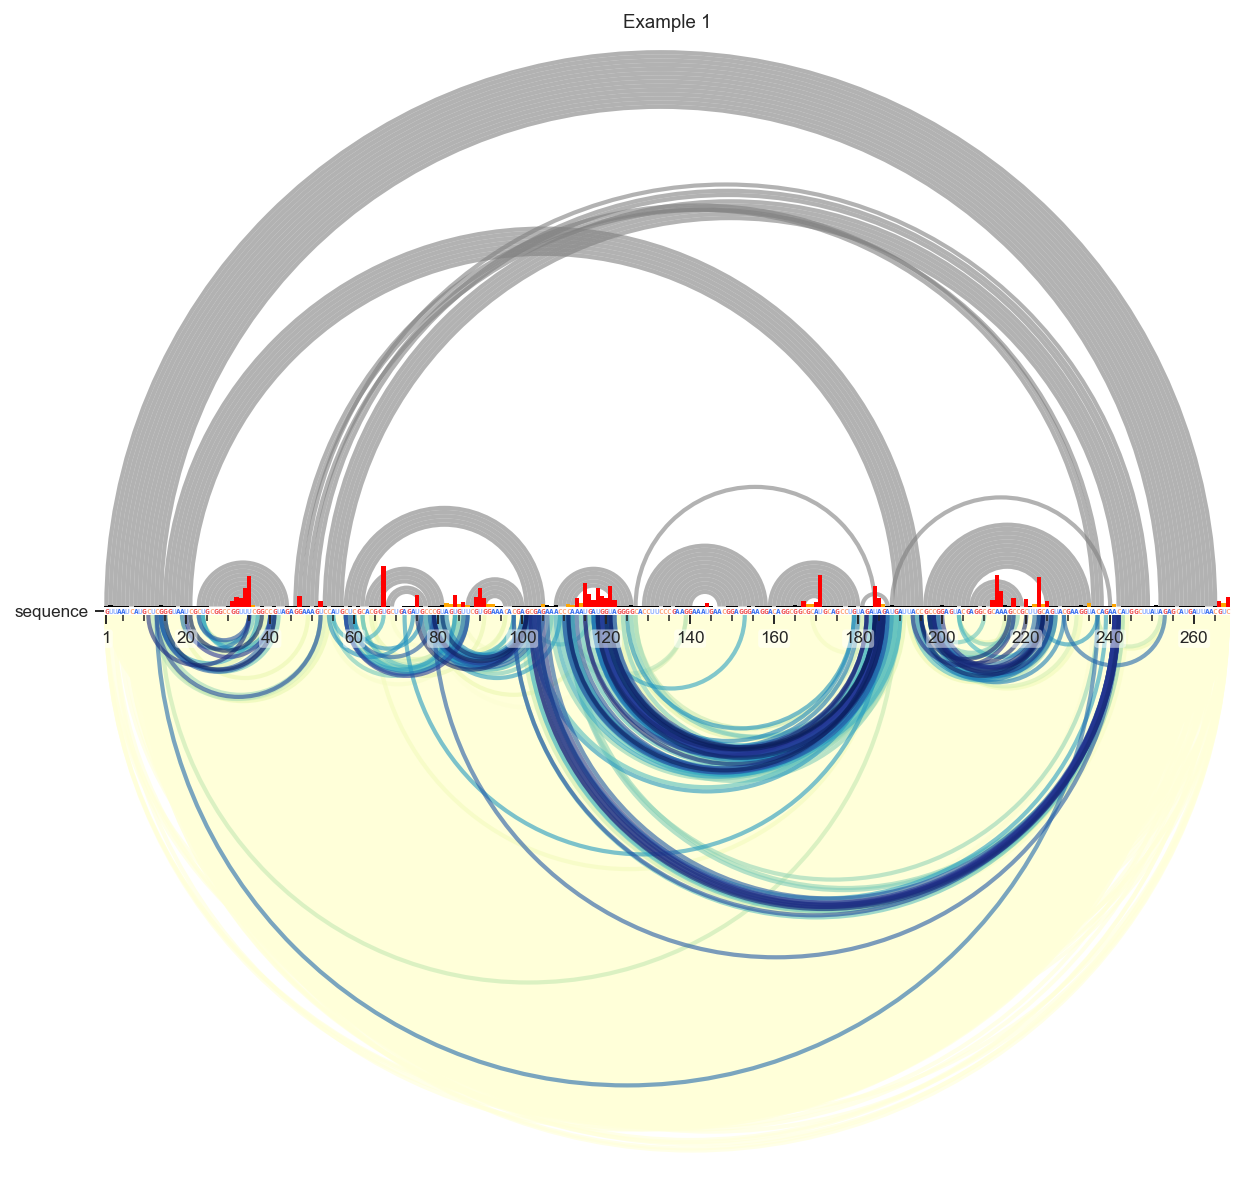

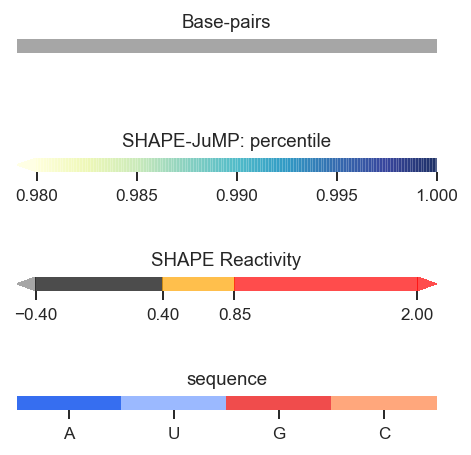

In [2]:
plot = rnav.plot_arcs(
    samples=[rnasep_1],
    sequence="shapejump",
    interactions="shapejump",
    structure="ss_pdb",
    profile="shapemap")


We can see here that the data is very dense; there is a yellow smudge behind
the blue and green arcs. These lower values are usually just noise, so lets
remove them by requiring the deletions to be in the 95th percentile.

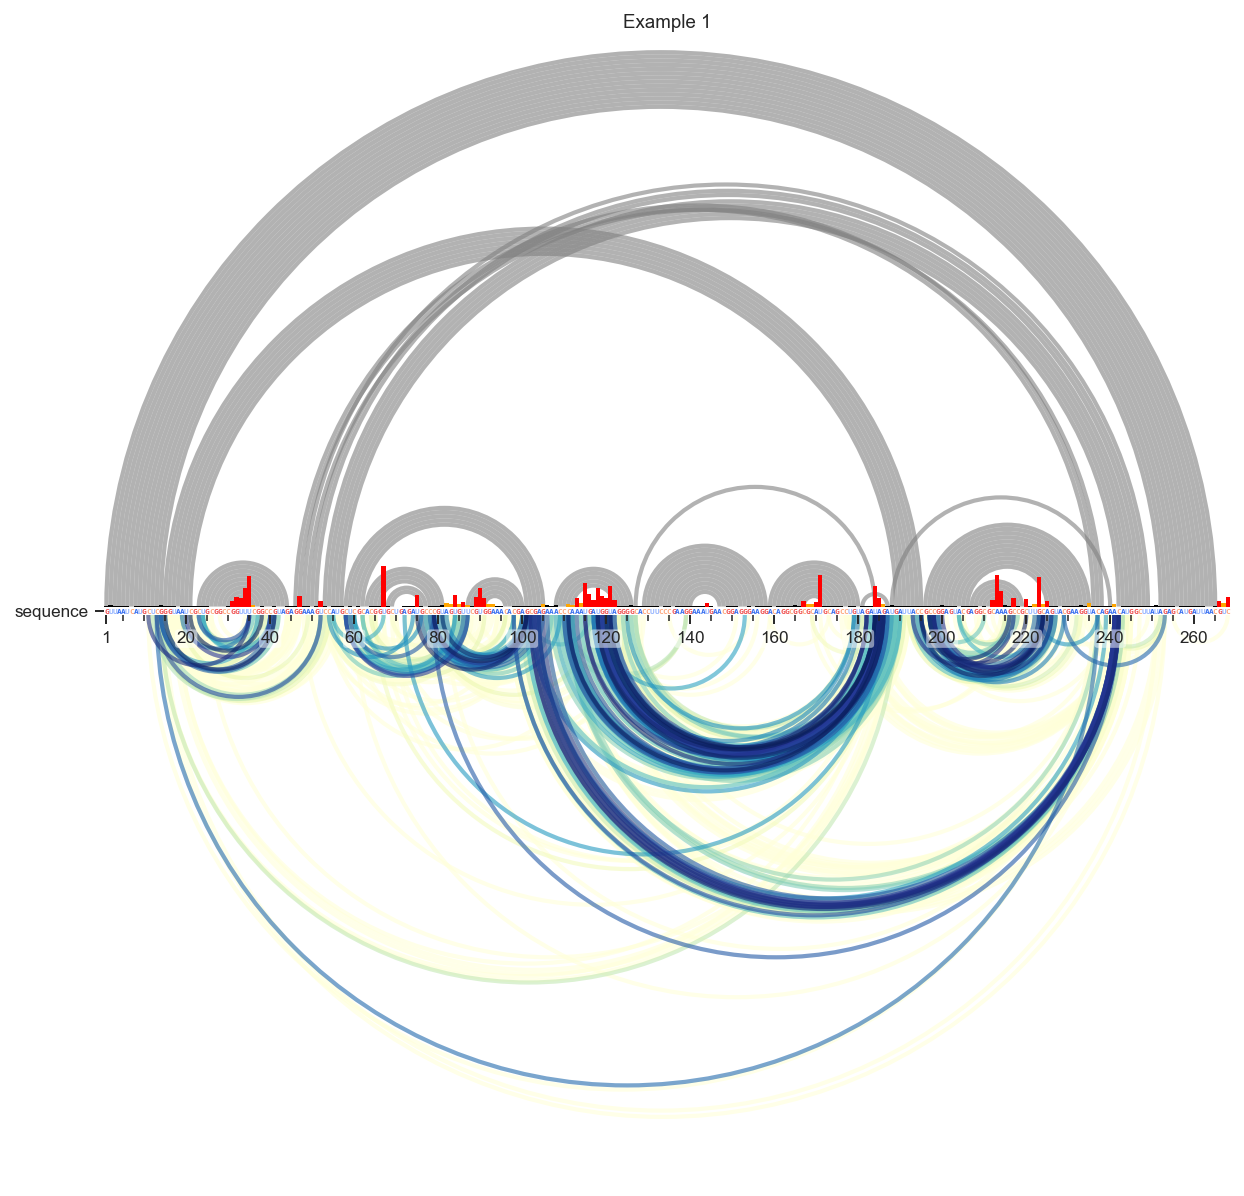

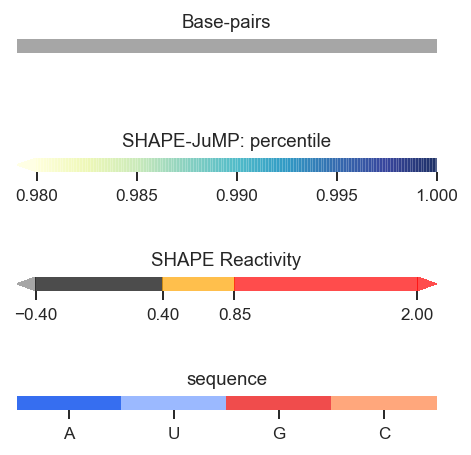

In [3]:
plot = rnav.plot_arcs(
    samples=[rnasep_1],
    sequence="shapejump",
    structure="ss_pdb",
    profile="shapemap",
    interactions={
        'interactions': 'shapejump',
        'Percentile_ge': 0.95},
    )


Better. Still, many of these are reflective of secondary structure. I'll remove
these by requiring the contact distance to be above 14. This means that it takes
at least 15 steps through the secondary structure graph to get from i to j.

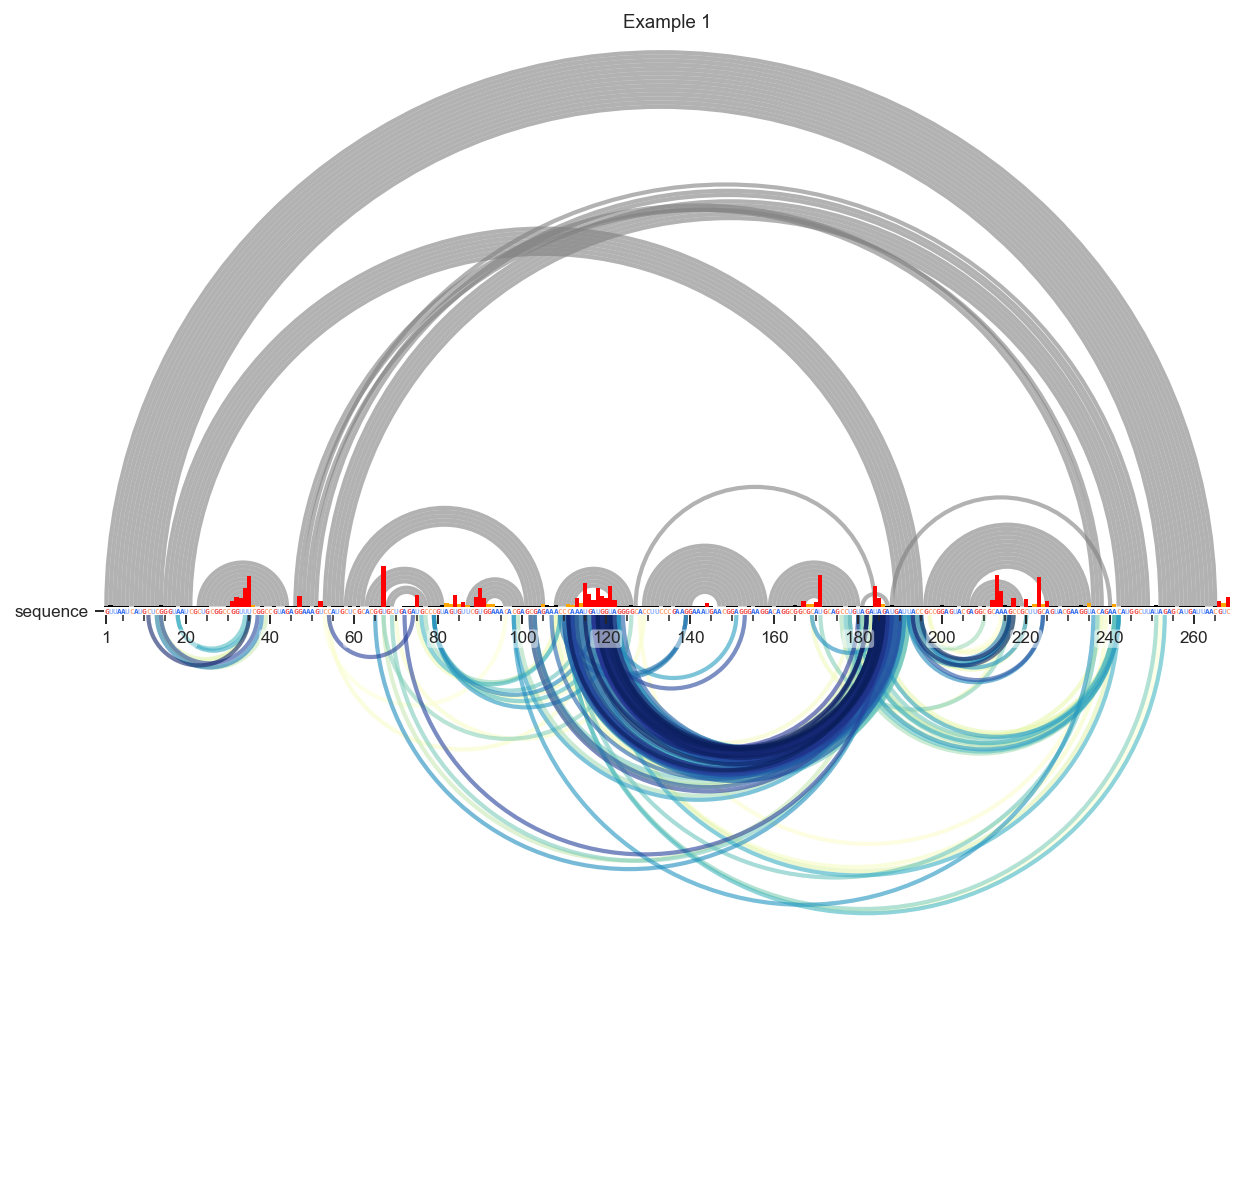

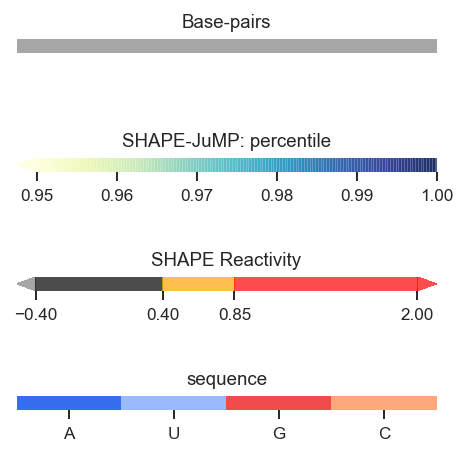

In [4]:
plot = rnav.plot_arcs(
    samples=[rnasep_1],
    sequence="shapejump",
    structure="ss_pdb",
    profile="shapemap",
    interactions={
        'interactions': 'shapejump',
        'Percentile_ge': 0.95,
        'normalization': 'min_max',
        'values': [0.95, 1.0],
        'min_cd': 15},
    )


Interesting...Let's test if these are really reflective of tertiary structure.
This time, we'll use the "Distance_02'" metric to color the arcs. This is 
calculated from our reference PDB structure as the 3D distance between the 2'
oxygen atom of nucleotide i and nucleotide j. We'll also have to change the
colormaps min and max values, since it is now being applied to the 3D distance
in angstroms. We'll also further limit the percentile (98th).

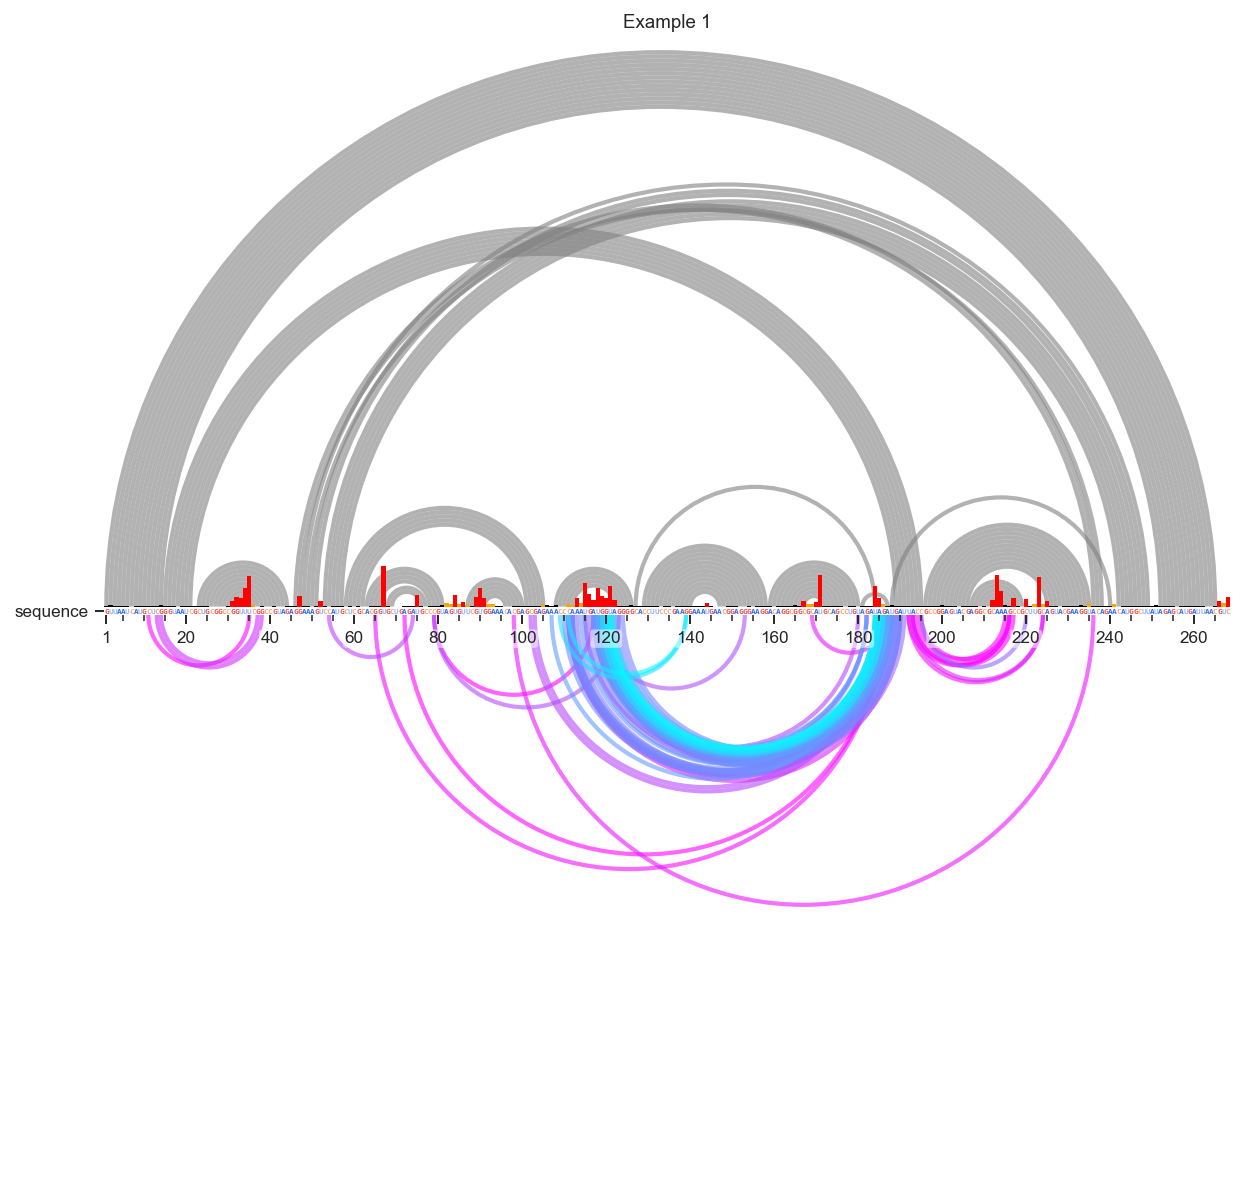

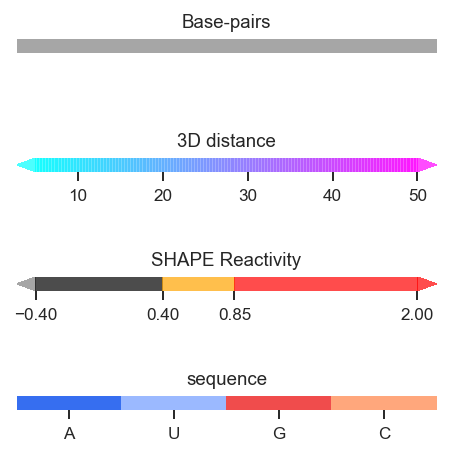

In [5]:
plot = rnav.plot_arcs(
    samples=[rnasep_1],
    sequence="shapejump",
    structure="ss_pdb",
    profile="shapemap",
    interactions={
        'interactions': 'shapejump',
        'Percentile_ge': 0.98,
        'normalization': 'min_max',
        'values': [5, 50],
        'min_cd': 15,
        'metric': "Distance_O2'"})


Many of the one-off deletions are quite far away, but the densest cluster here
is definitely close in space. Pretty neat!